# Bike Sharing Assignment

The Corona epidemic has caused dramatic revenue declines for US bike-sharing company BoomBikes. The company has created a business plan to better grasp the demand for shared bikes following a pandemic in order to bounce back Once the situation gets better, the scheme seeks to meet people's needs and generate notable profits. The corporation will borrow bikes from docks under computer control and bring them back to another pier.

The company wants to know:
* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

Adding required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from sklearn .metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

Reading, understand, clearing data

In [2]:
df = pd.read_csv('data/day.csv') 

Checking first 5 and last 5 rows and row, column count

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
df.shape

(730, 16)

Checking the missing values

In [6]:
print("Missing Values: ", df.isnull().sum())

Missing Values:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
print("Data Types: ", df.dtypes)

Data Types:  instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


Summary of data

In [8]:
print(df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.5448

Removing irrelevant column which can be derived from other column

In [9]:
# instant column is just row number
# casual and registered sum is cnt, these are dependent variable, seperate count not required
# dteday not required for analysis as for month and year in this case we already have column

irrelevant_columns = ['instant', 'casual', 'registered', 'dteday']

In [10]:
# dropping the irrelevant_columns
df = df.drop(irrelevant_columns, axis=1)

Checking data after column drop

In [11]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Renaming column name for better reading and understanding

In [12]:
df.rename(columns={'yr':'year', 'mnth':'month', 'cnt':'total_count', 'hum':'humidity'}, inplace=True)

In [13]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,total_count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# Mapping 'season' and 'weathersit' to categorical labels
season_mapping = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
weathersit_mapping = {
    1: 'Clear or Partly Cloudy',
    2: 'Mist or Cloudy',
    3: 'Light Snow or Rain',
    4: 'Heavy Rain or Snow'
}

In [15]:
df['season'] = df['season'].map(season_mapping)
df['weathersit'] = df['weathersit'].map(weathersit_mapping)

In [16]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,total_count
0,spring,0,1,0,6,0,Mist or Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist or Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear or Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear or Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear or Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
# Derived variable
# 1. Temprature difference
df['temp_diff'] = df['temp'] - df['atemp']

In [18]:
# wheather a day is weekend
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

In [19]:
# Normalised demand
df['normalized_count'] = df['total_count'] / df['total_count'].max()

In [20]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,total_count,temp_diff,is_weekend,normalized_count
0,spring,0,1,0,6,0,Mist or Cloudy,14.110847,18.18125,80.5833,10.749882,985,-4.070403,1,0.113036
1,spring,0,1,0,0,0,Mist or Cloudy,14.902598,17.68695,69.6087,16.652113,801,-2.784352,1,0.091921
2,spring,0,1,0,1,1,Clear or Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349,-1.419326,0,0.154808
3,spring,0,1,0,2,1,Clear or Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562,-2.406100,0,0.179252
4,spring,0,1,0,3,1,Clear or Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600,-2.158263,0,0.183613


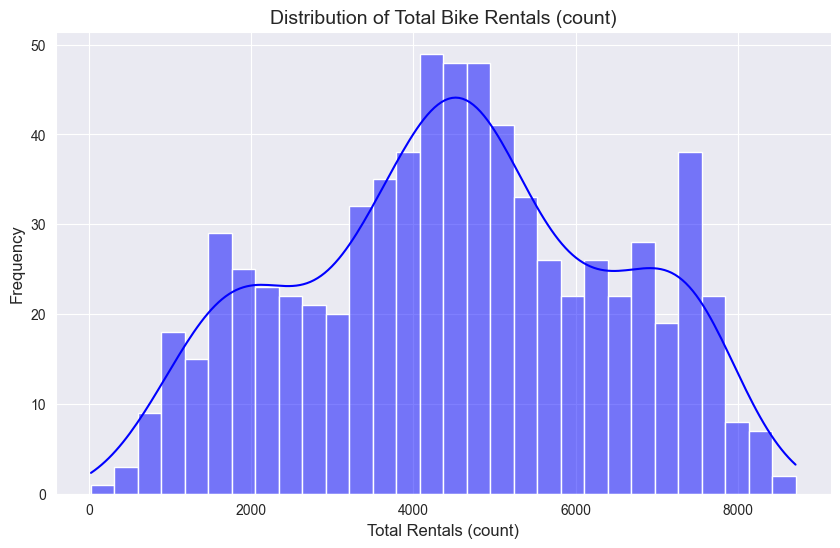

In [21]:
# Distribution of total count -> taget variable
plt.figure(figsize=(10, 6))
sns.histplot(df['total_count'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Bike Rentals (count)', fontsize=14)
plt.xlabel('Total Rentals (count)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

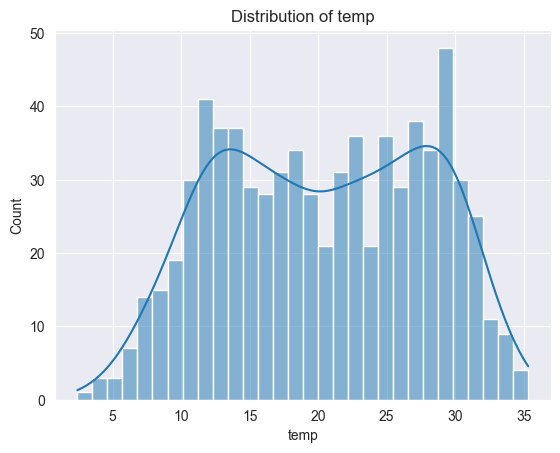

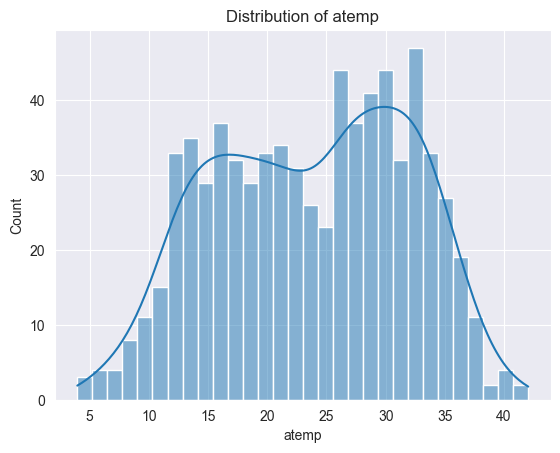

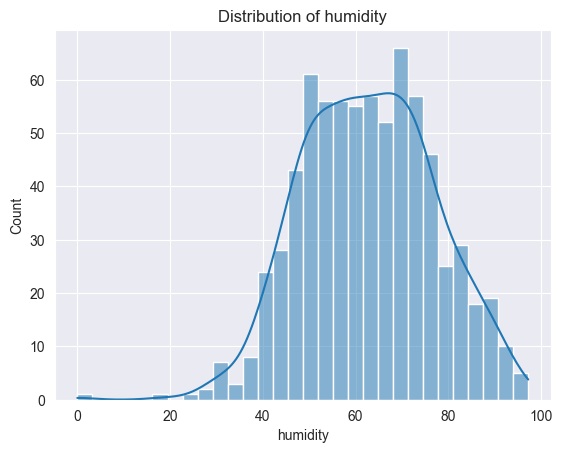

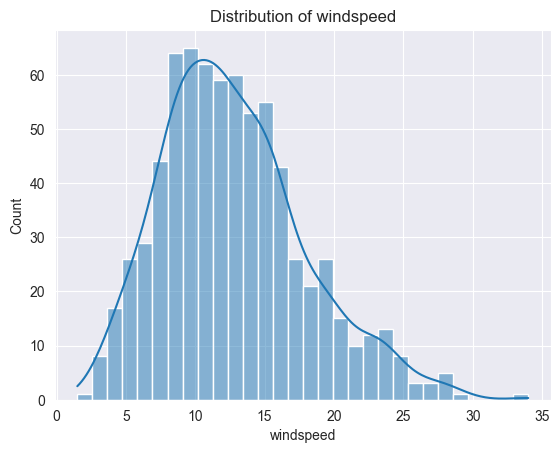

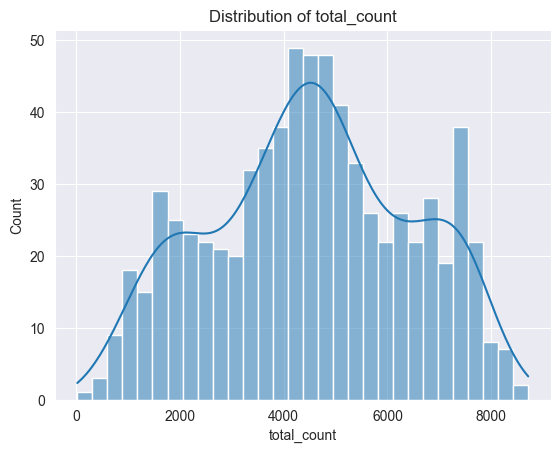

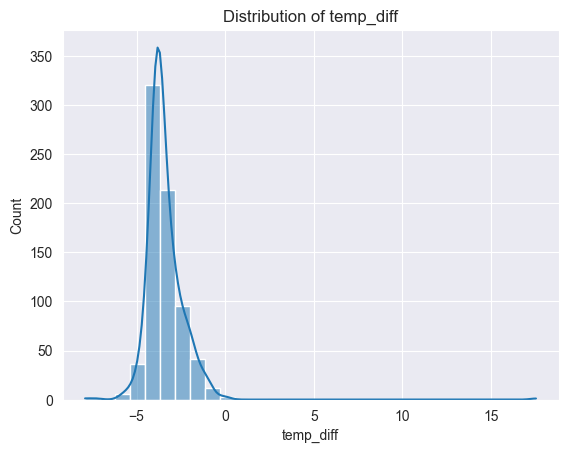

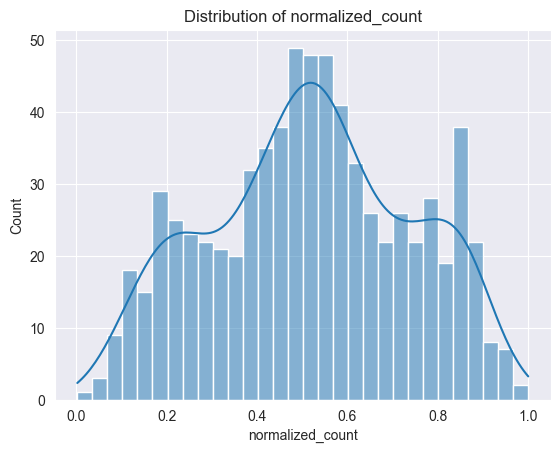

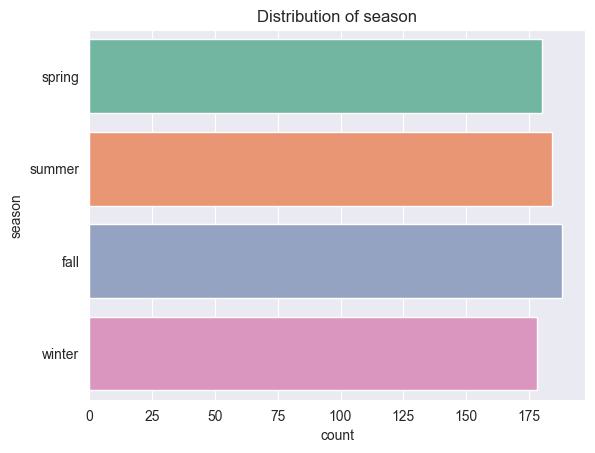

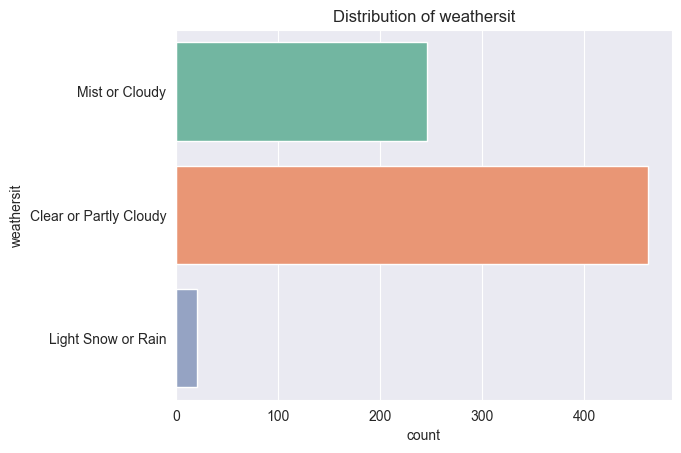

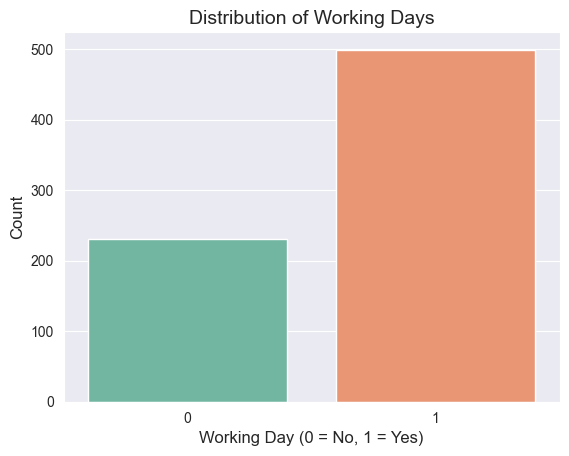

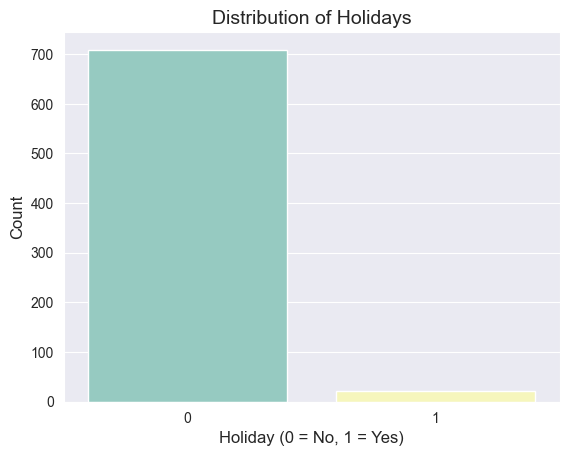

In [22]:
# Univariate analysis
numerical_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'total_count', 'temp_diff', 'normalized_count']

for var in numerical_vars:
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
    plt.show()
    
categorical_vars = ['season', 'weathersit']

for var in categorical_vars:
    sns.countplot(df[var], palette='Set2')
    plt.title(f'Distribution of {var}')
    plt.show()
    
sns.countplot(x='workingday', data=df, palette='Set2')
plt.title('Distribution of Working Days', fontsize=14)
plt.xlabel('Working Day (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

sns.countplot(x='holiday', data=df, palette='Set3')
plt.title('Distribution of Holidays', fontsize=14)
plt.xlabel('Holiday (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
  

In [23]:
df[numerical_vars].describe()

,temp,atemp,humidity,windspeed,total_count,temp_diff,normalized_count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849,-3.407062,0.517329
std,7.506729,8.150308,14.237589,5.195841,1936.011647,1.195945,0.222173
min,2.424346,3.953480,0.000000,1.500244,22.000000,-7.903550,0.002525
25%,13.811885,16.889713,52.000000,9.041650,3169.750000,-3.942097,0.363754
50%,20.465826,24.368225,62.625000,12.125325,4548.500000,-3.659499,0.521976
75%,26.880615,30.445775,72.989575,15.625589,5966.000000,-2.999787,0.684645
max,35.328347,42.044800,97.250000,34.000021,8714.000000,17.536653,1.000000


1. Max frequency are around temprature 13 to 26 degree, windspeed 9 to 15 and humidity 52 to 72
2. High Count on Working day

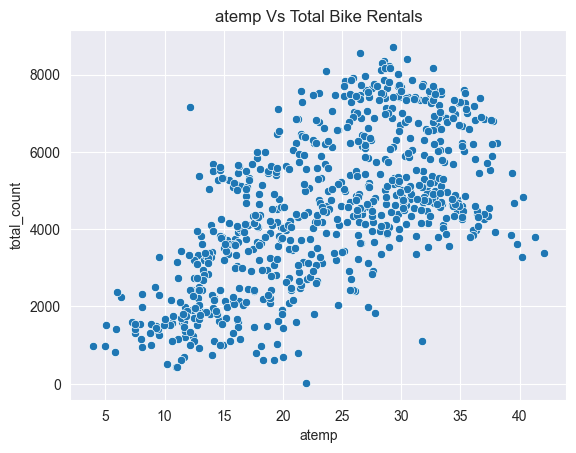

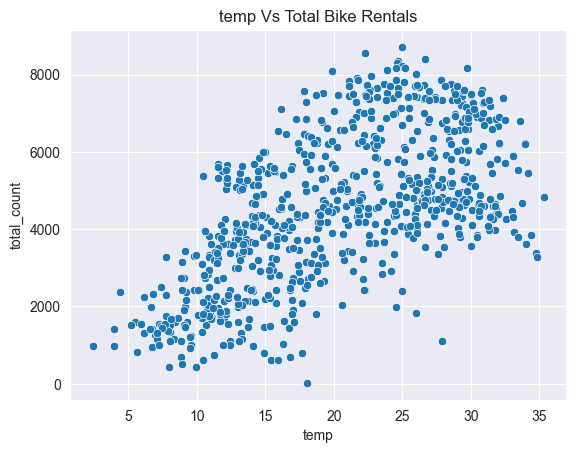

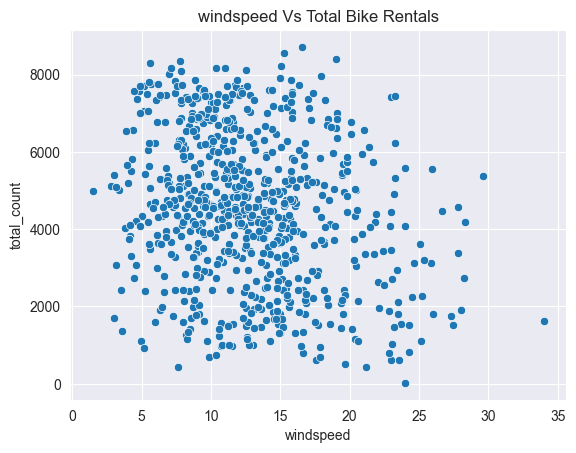

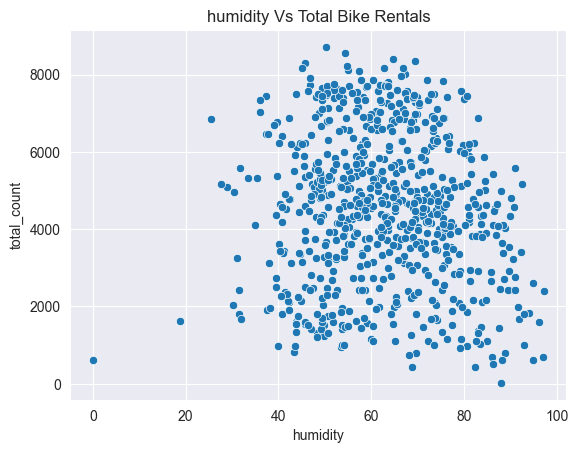

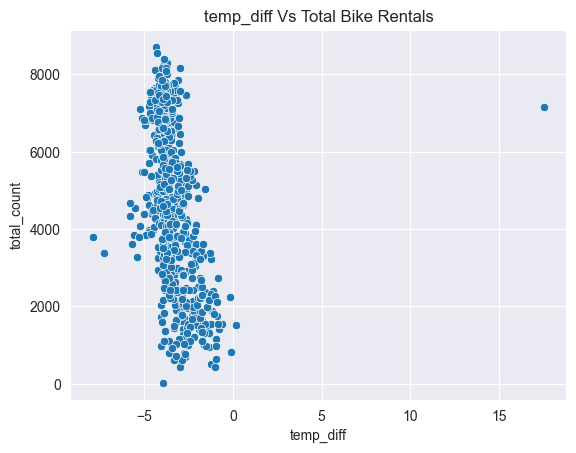

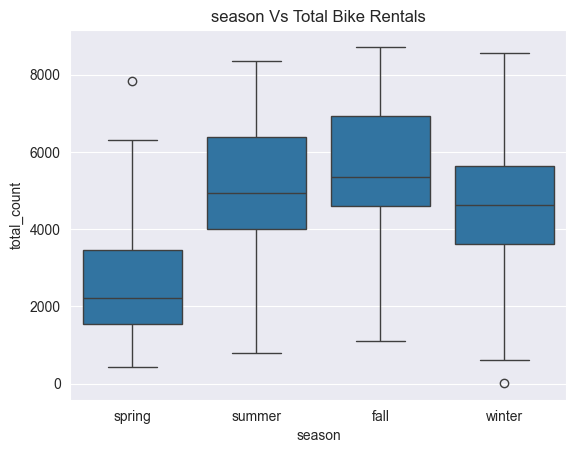

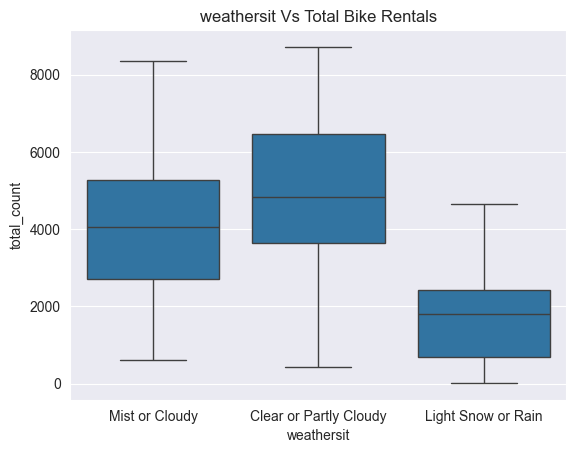

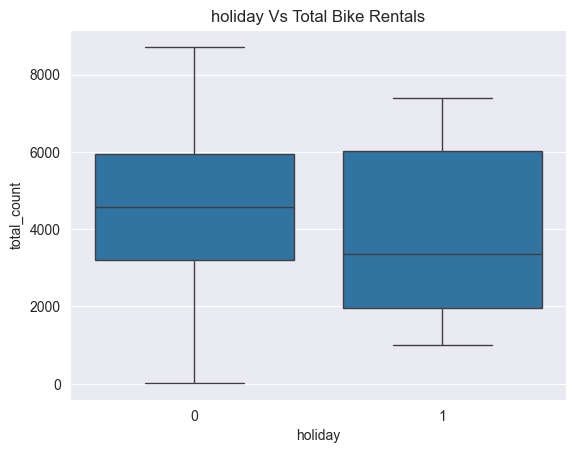

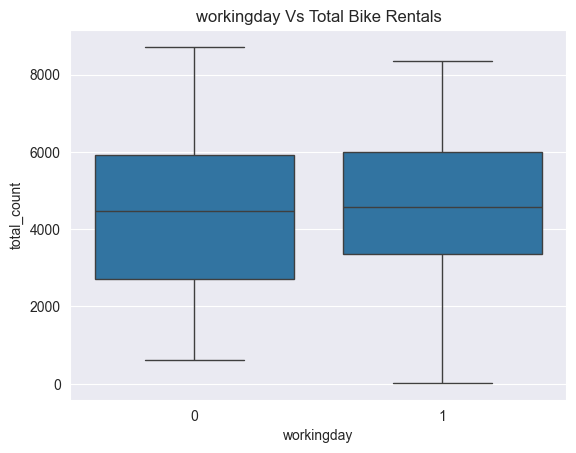

In [24]:
# Bivariate Analysis
# Bar plots for interaction effects, e.g., season and weathersit.

numerical_vars = ['atemp', 'temp', 'windspeed', 'humidity', 'temp_diff']

for var in numerical_vars:
    sns.scatterplot(x=var, y='total_count', data=df)
    plt.title(f'{var} Vs Total Bike Rentals')
    plt.show()
    
categorical_vars = ['season', 'weathersit', 'holiday', 'workingday']

for var in categorical_vars:
    sns.boxplot(x=var, y='total_count', data=df)
    plt.title(f'{var} Vs Total Bike Rentals')
    plt.show()


1. Temp and Atemp follow same trend showing similarity
2. windspeed between 5-20 show high rental count
3. humidity between 40-80 show high rental count
4. High rental during summer and fall season
5. High rental during mist, clear, partial cloudy

In [25]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,total_count,temp_diff,is_weekend,normalized_count
0,spring,0,1,0,6,0,Mist or Cloudy,14.110847,18.18125,80.5833,10.749882,985,-4.070403,1,0.113036
1,spring,0,1,0,0,0,Mist or Cloudy,14.902598,17.68695,69.6087,16.652113,801,-2.784352,1,0.091921
2,spring,0,1,0,1,1,Clear or Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349,-1.419326,0,0.154808
3,spring,0,1,0,2,1,Clear or Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562,-2.406100,0,0.179252
4,spring,0,1,0,3,1,Clear or Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600,-2.158263,0,0.183613


In [26]:
# Create dummy variables for 'season' and 'weathersit'
df = pd.get_dummies(df, columns=['season', 'weathersit'], drop_first=True)
print(df.head())

   year  month  holiday  weekday  workingday       temp     atemp  humidity  \
0     0      1        0        6           0  14.110847  18.18125   80.5833   
1     0      1        0        0           0  14.902598  17.68695   69.6087   
2     0      1        0        1           1   8.050924   9.47025   43.7273   
3     0      1        0        2           1   8.200000  10.60610   59.0435   
4     0      1        0        3           1   9.305237  11.46350   43.6957   

   windspeed  total_count  temp_diff  is_weekend  normalized_count  \
0  10.749882          985  -4.070403           1          0.113036   
1  16.652113          801  -2.784352           1          0.091921   
2  16.636703         1349  -1.419326           0          0.154808   
3  10.739832         1562  -2.406100           0          0.179252   
4  12.522300         1600  -2.158263           0          0.183613   

   season_spring  season_summer  season_winter  weathersit_Light Snow or Rain  \
0           True       

In [27]:
df.shape

(730, 18)

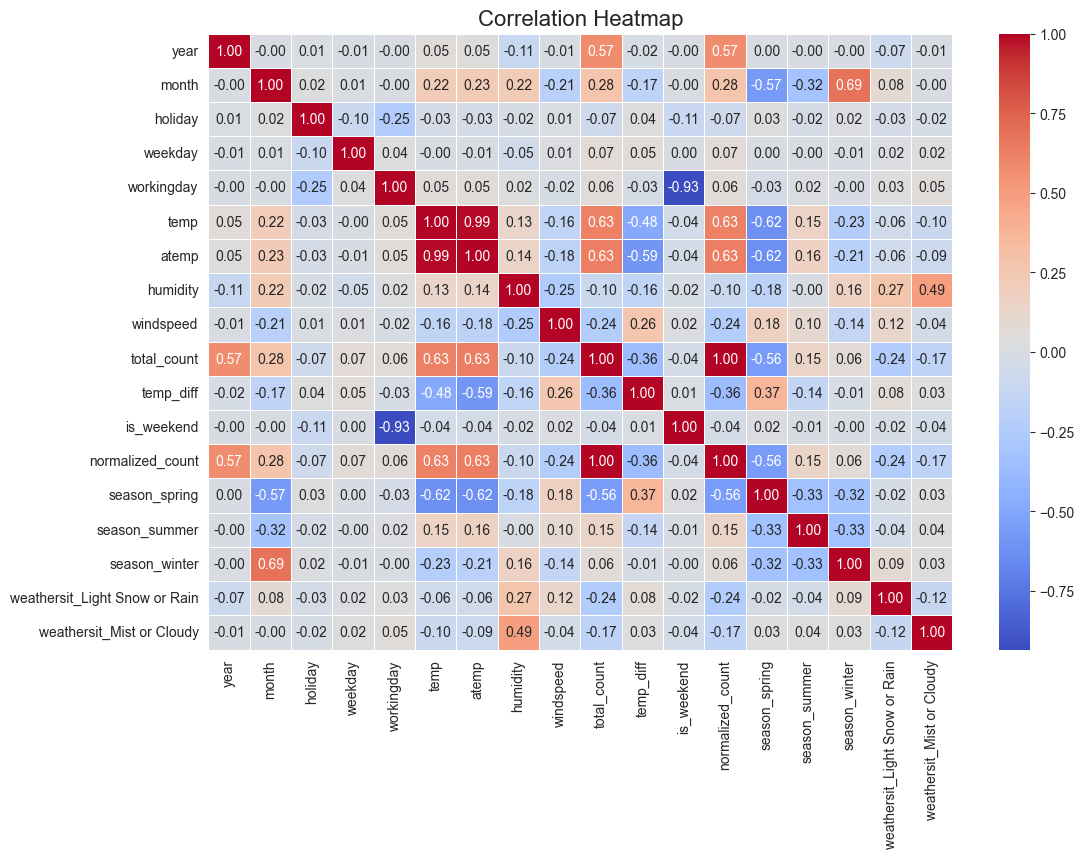

In [28]:
# Multivariate Analysis
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Strong positive relation with target variable (total_count):
1. temp
2. year
3. season_winter
4. season_summer
5. humidity
6. windspeed

weak or negligible co-relation:
1. holiday
2. weekday
3. is_weekend
4. temp_diff

multi-collinearity to address:
1. temp and atemp nearly identical, we can drop temp
2. normalised_count is redundant variable derived from total_count - we will remove this variable
3. season_spring, season_summer, season_winter these are dummy variable for season, multi-collinearity is expected and accepted because one is dropped

In [29]:
df.shape

(730, 18)

Preparing data for machine learning:

In [30]:
df1 = df.drop(columns=['temp', 'normalized_count', 'weekday', 'is_weekend', 'holiday', 'temp_diff'])

In [31]:
df1.shape

(730, 12)

Splitting data into train and test data

In [32]:
# random state as 42?
# The number 42 has no special statistical meaning—it is often chosen as a convention in the programming and data science community
df_train,df_test = train_test_split(df1, train_size=0.7, random_state=42)
print(df_train.shape)
print(df_test.shape)

(510, 12)
(220, 12)


Rescaling on numeric variables

In [33]:
# Rescaling on numeric variables: Doing Min-Max scaling
scaler = StandardScaler()
num_vars = ['atemp','humidity','windspeed']

# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,month,workingday,atemp,humidity,windspeed,total_count,season_spring,season_summer,season_winter,weathersit_Light Snow or Rain,weathersit_Mist or Cloudy
645,1,10,0,-0.572980,0.536118,0.021331,5478,False,False,True,False,True
163,0,6,1,0.747447,-1.006238,1.582512,5020,False,True,False,False,False
360,0,12,1,-0.942959,0.915732,0.004743,1162,True,False,False,False,True
640,1,10,1,0.731895,1.139911,-1.640566,7572,False,False,True,False,True
625,1,9,1,0.521746,1.704844,2.287541,4073,False,False,False,False,True


Building Model

In [34]:
y_train = df_train.pop('total_count')
X_train = df_train

1st Model with all the variable

In [35]:
X_train_sm = sm.add_constant(X_train)

In [36]:
X_train_sm.head()

,const,year,month,workingday,atemp,humidity,windspeed,season_spring,season_summer,season_winter,weathersit_Light Snow or Rain,weathersit_Mist or Cloudy
645,1.0,1,10,0,-0.572980,0.536118,0.021331,False,False,True,False,True
163,1.0,0,6,1,0.747447,-1.006238,1.582512,False,True,False,False,False
360,1.0,0,12,1,-0.942959,0.915732,0.004743,True,False,False,False,True
640,1.0,1,10,1,0.731895,1.139911,-1.640566,False,False,True,False,True
625,1.0,1,9,1,0.521746,1.704844,2.287541,False,False,False,False,True


In [37]:
bool_columns = ['season_spring', 'season_summer', 'season_winter', 
                'weathersit_Light Snow or Rain', 'weathersit_Mist or Cloudy']
X_train_sm[bool_columns] = X_train_sm[bool_columns].astype(int)

In [38]:
bool_columns = ['season_spring', 'season_summer', 'season_winter', 
                'weathersit_Light Snow or Rain', 'weathersit_Mist or Cloudy']
X_train[bool_columns] = X_train[bool_columns].astype(int)

In [40]:
X_train_sm.head(30)

,const,year,month,workingday,atemp,humidity,windspeed,season_spring,season_summer,season_winter,weathersit_Light Snow or Rain,weathersit_Mist or Cloudy
645,1.0,1,10,0,-0.572980,0.536118,0.021331,0,0,1,0,1
163,1.0,0,6,1,0.747447,-1.006238,1.582512,0,1,0,0,0
360,1.0,0,12,1,-0.942959,0.915732,0.004743,1,0,0,0,1
640,1.0,1,10,1,0.731895,1.139911,-1.640566,0,0,1,0,1
625,1.0,1,9,1,0.521746,1.704844,2.287541,0,0,0,0,1
711,1.0,1,12,1,-1.149278,-1.069009,-0.188544,0,0,1,0,0
311,1.0,0,11,1,-0.420991,0.622806,-1.606936,0,0,1,0,0
333,1.0,0,11,1,-1.044203,-0.154355,1.121031,0,0,1,0,0
456,1.0,1,4,1,-0.326810,-0.936187,1.674141,0,1,0,0,0
104,1.0,0,4,0,-0.237978,0.261127,0.516607,0,1,0,0,0


In [41]:
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     204.4
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          1.11e-176
Time:                        14:45:01   Log-Likelihood:                -4148.6
No. Observations:                 510   AIC:                             8321.
Df Residuals:                     498   BIC:                             8372.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3906.2931    198.140     19.715      0.000    3516.999    4295.587
year                           1973.1560     75.063     26.287      0.000    1825.676    2120.636
month                           -37.3149     20.020     -1.864      0.063     -76.649       2.020
workingday                      184.5538     79.507      2.321      0.021      28.344     340.763
atemp                           905.3361     68.738     13.171      0.000     770.283    1040.389
humidity                       -165.1544     50.161     -3.292      0.001    -263.709     -66.600
windspeed                      -168.2492     40.780     -4.126      0.000    -248.372     -88.127
season_spring                 -1183.3595    205.627     -5.755      0.000   -1587.363    -779.356
season_summer                   134.7741    130.132      1.036      0.301    -120.902     390.450
season_winter                   752.5480    154.193      4.881      0.000     449.598    1055.498
weathersit_Light Snow or Rain -1773.3253    247.299     -7.171      0.000   -2259.203   -1287.448
weathersit_Mist or Cloudy      -448.0210     97.252     -4.607      0.000    -639.095    -256.947
==============================================================================
Omnibus:                       68.480   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.020
Skew:                          -0.730   Prob(JB):                     1.61e-33
Kurtosis:                       5.230   Cond. No.                         60.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,month,6.25
8,season_winter,4.29
6,season_spring,3.31
3,atemp,3.04
2,workingday,2.85
10,weathersit_Mist or Cloudy,2.33
0,year,2.09
4,humidity,1.79
7,season_summer,1.68
9,weathersit_Light Snow or Rain,1.30


2nd Model Building after dropping column month

In [43]:
X = X_train.drop(columns=['month'], axis=1)

In [44]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     223.4
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          4.05e-177
Time:                        14:45:30   Log-Likelihood:                -4150.4
No. Observations:                 510   AIC:                             8323.
Df Residuals:                     499   BIC:                             8369.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3617.4301    123.758     29.230      0.000    3374.279    3860.582
year                           1970.0647     75.231     26.187      0.000    1822.256    2117.873
workingday                      191.5394     79.615      2.406      0.016      35.118     347.961
atemp                           905.1989     68.909     13.136      0.000     769.812    1040.586
humidity                       -172.0509     50.149     -3.431      0.001    -270.579     -73.522
windspeed                      -166.1014     40.865     -4.065      0.000    -246.390     -85.813
season_spring                 -1013.6674    184.830     -5.484      0.000   -1376.809    -650.526
season_summer                   244.4580    116.354      2.101      0.036      15.855     473.061
season_winter                   644.4196    143.218      4.500      0.000     363.036     925.803
weathersit_Light Snow or Rain -1778.0030    247.898     -7.172      0.000   -2265.056   -1290.950
weathersit_Mist or Cloudy      -448.7805     97.491     -4.603      0.000    -640.325    -257.236
==============================================================================
Omnibus:                       69.886   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.834
Skew:                          -0.751   Prob(JB):                     1.77e-33
Kurtosis:                       5.200   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,season_spring,3.00
1,workingday,2.63
2,atemp,2.38
9,weathersit_Mist or Cloudy,2.24
7,season_winter,2.00
0,year,1.99
3,humidity,1.78
6,season_summer,1.61
8,weathersit_Light Snow or Rain,1.27
4,windspeed,1.21


All feature have p value less than 0.05 and VF below 5

Residual Analysis

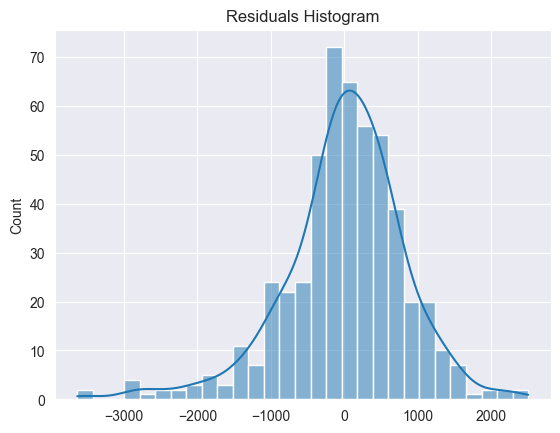

In [46]:
y_train_pred = lr_model.predict(X_train_sm)
residuals = y_train - y_train_pred

# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title("Residuals Histogram")
plt.show()

From Above graph

Error terms are normally distributed which satisfy the assumption of Linear Regressio

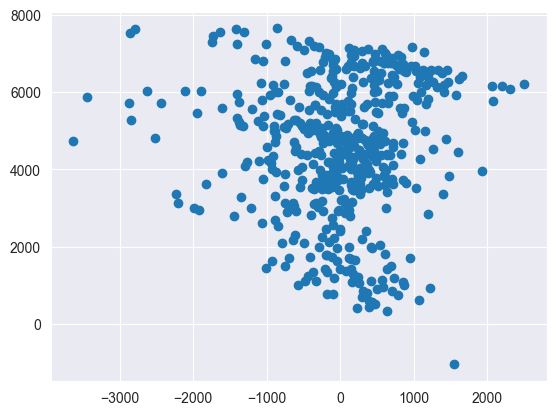

In [47]:
# Homoscedasticity 
plt.scatter(residuals, y_train_pred)
plt.show()

There is no pattern observed in the above graph, hence Homoscedasticity assumption is satisfied

## Prediction and evaluation on the test set

In [48]:
# Rescaling on numeric variables for Test set
num_vars = ['atemp','humidity','windspeed']

# Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,month,workingday,atemp,humidity,windspeed,total_count,season_spring,season_summer,season_winter,weathersit_Light Snow or Rain,weathersit_Mist or Cloudy
468,1,4,0,0.046303,-0.946452,0.038039,7460,False,True,False,False,False
148,0,5,0,0.833170,1.319255,0.348748,4788,False,True,False,False,False
302,0,10,0,-0.981848,-0.079626,-0.154964,3331,False,False,True,False,False
355,0,12,1,-0.335397,0.879863,-1.900659,3068,True,False,False,False,True
515,1,5,1,0.930509,-1.018190,0.096912,7338,False,True,False,False,False


In [49]:
# Splitting data into y_test and X_test
y_test = df_test.pop('total_count')
X_test = df_test

In [50]:
bool_columns = ['season_spring', 'season_summer', 'season_winter', 
                'weathersit_Light Snow or Rain', 'weathersit_Mist or Cloudy']
X_test[bool_columns] = X_test[bool_columns].astype(int)

In [51]:
# adding a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,year,month,workingday,atemp,humidity,windspeed,season_spring,season_summer,season_winter,weathersit_Light Snow or Rain,weathersit_Mist or Cloudy
468,1.0,1,4,0,0.046303,-0.946452,0.038039,0,1,0,0,0
148,1.0,0,5,0,0.833170,1.319255,0.348748,0,1,0,0,0
302,1.0,0,10,0,-0.981848,-0.079626,-0.154964,0,0,1,0,0
355,1.0,0,12,1,-0.335397,0.879863,-1.900659,1,0,0,0,1
515,1.0,1,5,1,0.930509,-1.018190,0.096912,0,1,0,0,0


In [52]:
# dropping variables whiach are not in final model
X_test_sm = X_test_sm.drop(['month'], axis=1)
X_test_sm.head()

,const,year,workingday,atemp,humidity,windspeed,season_spring,season_summer,season_winter,weathersit_Light Snow or Rain,weathersit_Mist or Cloudy
468,1.0,1,0,0.046303,-0.946452,0.038039,0,1,0,0,0
148,1.0,0,0,0.833170,1.319255,0.348748,0,1,0,0,0
302,1.0,0,0,-0.981848,-0.079626,-0.154964,0,0,1,0,0
355,1.0,0,1,-0.335397,0.879863,-1.900659,1,0,0,0,1
515,1.0,1,1,0.930509,-1.018190,0.096912,0,1,0,0,0


In [53]:
# predict
y_test_pred = lr_model.predict(X_test_sm)

In [54]:
# evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8150661921516388

## Building model using RFE

In [55]:
# importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [66]:
# reading the data
df_2 = pd.read_csv('data/day.csv')
df_2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [67]:
# dropping columns which are not needed in analysis
df_2 = df_2.drop(['instant','dteday','casual','registered'],axis=1)
df_2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [68]:
# Renaming columns for better understanding 
df_2.rename(columns={'yr':'year','mnth':'month','hum':"humidity",'cnt':'total_count'}, inplace=True)
df_2.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,total_count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [69]:
# Mapping 'season' and 'weathersit' to categorical labels
season_mapping = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
weathersit_mapping = {
    1: 'Clear or Partly Cloudy',
    2: 'Mist or Cloudy',
    3: 'Light Snow or Rain',
    4: 'Heavy Rain or Snow'
}

In [71]:
df_2['season'] = df_2['season'].map(season_mapping)
df_2['weathersit'] = df_2['weathersit'].map(weathersit_mapping)

In [72]:
# Getting the dummy variables for categorical variables
df_2 = pd.get_dummies(df_2, columns= ['season','weathersit'], drop_first=True) 
df_2.head()

,year,month,holiday,weekday,workingday,temp,atemp,humidity,windspeed,total_count,season_spring,season_summer,season_winter,weathersit_Light Snow or Rain,weathersit_Mist or Cloudy
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,True,False,False,False,True
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,False,False,True
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,False,False
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,False,False
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,False,False


In [73]:
# dropping temp as it is very high correlated with atemp

df_2 = df_2.drop(['temp'], axis = 1)
df_2.head()

,year,month,holiday,weekday,workingday,atemp,humidity,windspeed,total_count,season_spring,season_summer,season_winter,weathersit_Light Snow or Rain,weathersit_Mist or Cloudy
0,0,1,0,6,0,18.18125,80.5833,10.749882,985,True,False,False,False,True
1,0,1,0,0,0,17.68695,69.6087,16.652113,801,True,False,False,False,True
2,0,1,0,1,1,9.47025,43.7273,16.636703,1349,True,False,False,False,False
3,0,1,0,2,1,10.60610,59.0435,10.739832,1562,True,False,False,False,False
4,0,1,0,3,1,11.46350,43.6957,12.522300,1600,True,False,False,False,False


In [74]:
# splitting data into train and test
df_train,df_test = train_test_split(df_2, train_size=0.7, random_state=42)
print(df_train.shape)
print(df_test.shape)


(510, 14)
(220, 14)


In [75]:
# Rescaling on numeric variables: Min-Max scaling
scaler = StandardScaler()
num_vars = ['atemp','humidity','windspeed']

# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,month,holiday,weekday,workingday,atemp,humidity,windspeed,total_count,season_spring,season_summer,season_winter,weathersit_Light Snow or Rain,weathersit_Mist or Cloudy
645,1,10,1,1,0,-0.572980,0.536118,0.021331,5478,False,False,True,False,True
163,0,6,0,1,1,0.747447,-1.006238,1.582512,5020,False,True,False,False,False
360,0,12,0,2,1,-0.942959,0.915732,0.004743,1162,True,False,False,False,True
640,1,10,0,3,1,0.731895,1.139911,-1.640566,7572,False,False,True,False,True
625,1,9,0,2,1,0.521746,1.704844,2.287541,4073,False,False,False,False,True


In [76]:
# Splitting predictors and target variable

y_train = df_train.pop('total_count')
X_train = df_train

In [77]:
bool_columns = ['season_spring', 'season_summer', 'season_winter', 
                'weathersit_Light Snow or Rain', 'weathersit_Mist or Cloudy']
X_train[bool_columns] = X_train[bool_columns].astype(int)

In [79]:
X_train.head()

,year,month,holiday,weekday,workingday,atemp,humidity,windspeed,season_spring,season_summer,season_winter,weathersit_Light Snow or Rain,weathersit_Mist or Cloudy
645,1,10,1,1,0,-0.572980,0.536118,0.021331,0,0,1,0,1
163,0,6,0,1,1,0.747447,-1.006238,1.582512,0,1,0,0,0
360,0,12,0,2,1,-0.942959,0.915732,0.004743,1,0,0,0,1
640,1,10,0,3,1,0.731895,1.139911,-1.640566,0,0,1,0,1
625,1,9,0,2,1,0.521746,1.704844,2.287541,0,0,0,0,1


In [81]:
# Running RFE with 10 output variable
lm = LinearRegression()
lm.fit(X_train,y_train)

# Running RFE
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train,y_train)

In [82]:
print(rfe.ranking_)

# Check which features were selected
print(rfe.support_)

[1 4 1 3 2 1 1 1 1 1 1 1 1]
[ True False  True False False  True  True  True  True  True  True  True
  True]


In [83]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', np.True_, np.int64(1)),
 ('month', np.False_, np.int64(4)),
 ('holiday', np.True_, np.int64(1)),
 ('weekday', np.False_, np.int64(3)),
 ('workingday', np.False_, np.int64(2)),
 ('atemp', np.True_, np.int64(1)),
 ('humidity', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_spring', np.True_, np.int64(1)),
 ('season_summer', np.True_, np.int64(1)),
 ('season_winter', np.True_, np.int64(1)),
 ('weathersit_Light Snow or Rain', np.True_, np.int64(1)),
 ('weathersit_Mist or Cloudy', np.True_, np.int64(1))]

In [84]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'atemp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_Light Snow or Rain',
       'weathersit_Mist or Cloudy'],
      dtype='object')

In [85]:
X_train.columns[~rfe.support_]

Index(['month', 'weekday', 'workingday'], dtype='object')

Building Model using stats model for detailed statics

In [86]:
# creating X_train dataset with RFE selected features
X_train_rfe = X_train[col]

# Adding a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Running linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [87]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     224.8
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          1.10e-177
Time:                        13:45:42   Log-Likelihood:                -4149.1
No. Observations:                 510   AIC:                             8320.
Df Residuals:                     499   BIC:                             8367.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [88]:
vif = pd.DataFrame()
X_train_new = X_train_rfe.drop(['const'], axis=1)
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,season_spring,2.38
9,weathersit_Mist or Cloudy,2.18
2,atemp,1.98
0,year,1.97
3,humidity,1.75
7,season_winter,1.62
6,season_summer,1.39
8,weathersit_Light Snow or Rain,1.26
4,windspeed,1.21
1,holiday,1.04


In [89]:
y_train_total_count =lm.predict(X_train_rfe)

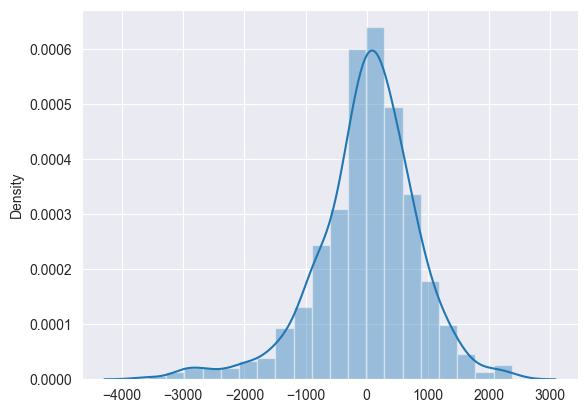

In [90]:
fig = plt.figure()
sns.distplot((y_train-y_train_total_count), bins=20)
plt.show()

In [91]:
# Applying scaling on the test set
num_vars = ['atemp', 'humidity', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,month,holiday,weekday,workingday,atemp,humidity,windspeed,total_count,season_spring,season_summer,season_winter,weathersit_Light Snow or Rain,weathersit_Mist or Cloudy
468,1,4,0,6,0,0.046303,-0.946452,0.038039,7460,False,True,False,False,False
148,0,5,0,0,0,0.833170,1.319255,0.348748,4788,False,True,False,False,False
302,0,10,0,0,0,-0.981848,-0.079626,-0.154964,3331,False,False,True,False,False
355,0,12,0,4,1,-0.335397,0.879863,-1.900659,3068,True,False,False,False,True
515,1,5,0,4,1,0.930509,-1.018190,0.096912,7338,False,True,False,False,False


In [92]:
y_test = df_test.pop('total_count')
X_test = df_test

In [93]:
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [94]:
bool_columns = ['season_spring', 'season_summer', 'season_winter', 
                'weathersit_Light Snow or Rain', 'weathersit_Mist or Cloudy']
X_test_new[bool_columns] = X_test_new[bool_columns].astype(int)

In [95]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

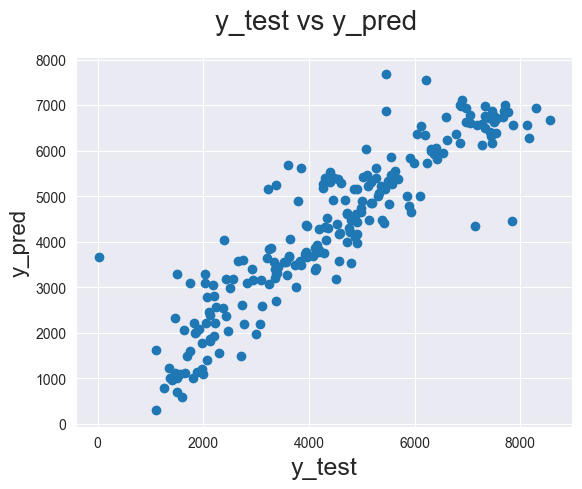

In [96]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    

In [97]:
r2_score(y_true=y_test, y_pred=y_pred)

0.8182617224275326